In [14]:
import slideio
from PIL import Image, ImageOps, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import os
import tqdm
import cv2

In [4]:
root = "/home/user/workspace/datasets/origin/20220403_neg"

files = os.listdir(root)

x, y = 10000, 10000
size = 256 * 50
bar = tqdm.tqdm(total=len(files))
for f in files:
    path = f"{root}/{f}"
    idx = f.split(",")[1].split("_")[1].replace(".svs", '')
    
    bar.set_description(f"{idx} loading")
    slide = slideio.open_slide(path, "SVS")
    scene = slide.get_scene(0)    # wsi size: (51792, 51629)
    
    bar.set_description(f"{idx} trimming")
    image = scene.read_block((x, y, size, size))
    
    bar.set_description(f"{idx} save")
    save_path = f"/home/user/workspace/datasets/LC20_2560/{idx}_{x}_{y}_{size}.jpeg"
    plt.imsave(save_path, image)
    
    bar.update(1)

1002204 save: 100%|█████████████████████████████| 31/31 [05:31<00:00, 10.76s/it]

In [45]:
img_path = "/home/user/workspace/datasets/LC20_2560/1002176_10000_10000_12800.jpeg"

img = Image.open(img_path)
img = img.convert("RGB")

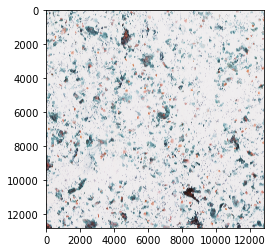

In [46]:
plt.imshow(img)

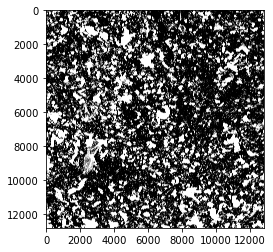

In [47]:
gray_img = img.convert("L")
mask = gray_img.point(lambda x: 0 if x > 230 else 1)
plt.imshow(mask, cmap="gray")

In [48]:
mask_stack = np.dstack([mask]*3)

# im = Image.composite(img, , mask)
im = img * mask_stack

In [52]:
a = np.array(im)
a[1:3]
# plt.imshow(a[100:100, 100:100, :])

array([[[71, 50, 69],
        [69, 50, 69],
        [75, 58, 76],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[71, 53, 69],
        [70, 53, 69],
        [75, 61, 76],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [21]:
img = np.array(img)
masked_img = []
for i in range(0, len(mask_stack)):
    mask_ = mask_stack[i]
    img_ = img[i]
    masked_img.append(mask_ * img_)

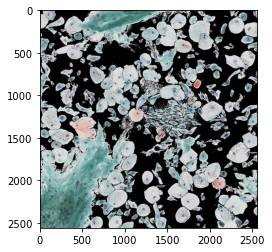

In [145]:
plt.imshow(masked_img)

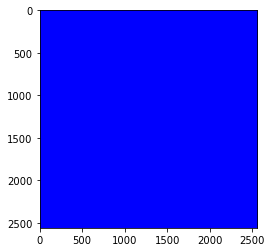

In [130]:
mask_stack = mask_stack.astype("float32")/255.0
img_stack = np.array(img).astype("float32")/255.0

masked = (mask_stack * img) + ((1-mask_stack) * (0.0,0.0,1.0))
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

plt.imshow(masked)
    

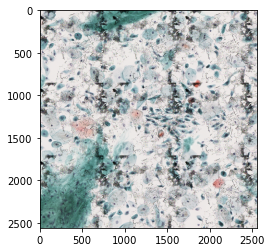

In [103]:
plt.imshow(mask)

In [59]:
for row in gray_arr:
    for px in row:
        print(px)
    break

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
